### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

Создайте датафреймы X и y из этих данных.

In [4]:
X = pd.DataFrame(boston['data'], columns=boston['feature_names'])
X.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10


In [5]:
y = pd.DataFrame(boston['target'], columns=['price'])
y.head(10)

,price
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
5,28.7
6,22.9
7,27.1
8,16.5
9,18.9


Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test) с помощью функции train_test_split так, чтобы размер тестовой выборки составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.

In [6]:
from sklearn.model_selection import train_test_split

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
scaler = StandardScaler()

X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

Постройте модель TSNE на тренировочный данных с параметрами: n_components=2, learning_rate=250, random_state=42.

In [27]:
from sklearn.manifold import TSNE

In [28]:
tsne = TSNE(n_components=2, learning_rate=250, random_state=42)

In [29]:
X_train_tsne = tsne.fit_transform(X_train_scaled)

X_train_tsne.shape

(404, 2)

Постройте диаграмму рассеяния на этих данных.

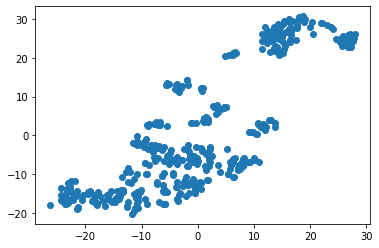

In [30]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1])

plt.show()

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера, используйте все признаки из датафрейма X_train.

Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [31]:
from sklearn.cluster import KMeans

In [35]:
kmeans = KMeans(n_clusters=2, max_iter=100, random_state=42)

In [36]:
labels_train = kmeans.fit_predict(X_train_scaled)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE, и раскрасьте точки из разных кластеров разными цветами.

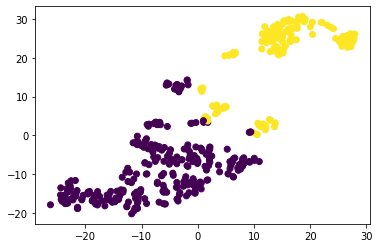

In [37]:
plt.scatter(X_train_tsne[:, 0], X_train_tsne[:, 1], c=labels_train)

plt.show()

Вычислите средние значения price и CRIM в разных кластерах.

In [52]:
print(f"Кластер 0. Ср. цена: {y_train[labels_train == 0].mean()['price']}")
print(f"Кластер 1. Ср. цена: {y_train[labels_train == 1].mean()['price']}")
print(f"Кластер 0. Ср. криминальность: {X_train[labels_train == 0]['CRIM'].mean()}")
print(f"Кластер 1. Ср. криминальность: {X_train[labels_train == 1]['CRIM'].mean()}")

Кластер 0. Ср. цена: 26.06654135338346
Кластер 1. Ср. цена: 16.49347826086957
Кластер 0. Ср. криминальность: 0.2766786090225563
Кластер 1. Ср. криминальность: 10.03253507246377


### * Задание 3

Примените модель KMeans, построенную в предыдущем задании, к данным из тестового набора.

In [53]:
labels_test = kmeans.predict(X_test_scaled)

Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [57]:
print(f"Кластер 0. Ср. цена: {y_test[labels_test == 0].mean()['price']}")
print(f"Кластер 1. Ср. цена: {y_test[labels_test == 1].mean()['price']}")
print(f"Кластер 0. Ср. криминальность: {X_test[labels_test == 0]['CRIM'].mean()}")
print(f"Кластер 1. Ср. криминальность: {X_test[labels_test == 1]['CRIM'].mean()}")

Кластер 0. Ср. цена: 24.412698412698415
Кластер 1. Ср. цена: 16.76410256410256
Кластер 0. Ср. криминальность: 0.19570111111111108
Кластер 1. Ср. криминальность: 9.180189743589745
